# Problem Statement

# Title: Predicting Sales Based on Advertising Spend

# Background:

In today's competitive market, companies are constantly looking for ways to optimize their advertising budgets to maximize sales. Understanding the relationship between advertising expenditure across various media channels and sales performance is crucial for making informed marketing decisions. This dataset contains data on advertising expenditures across three channels: TV, Radio, and Newspaper, along with the resulting sales figures.

# Objective:

The objective of this analysis is to build a predictive model that can accurately forecast sales based on the amount of money spent on TV, Radio, and Newspaper advertisements. This model will help in understanding the impact of each advertising channel on sales and in making strategic decisions regarding budget allocation to maximize sales.

# Dataset Description: 

The dataset consists of the following columns:
1.	TV: Amount of money spent on TV advertising (in thousands of dollars).
2.	Radio: Amount of money spent on Radio advertising (in thousands of dollars).
3.	Newspaper: Amount of money spent on Newspaper advertising (in thousands of dollars).
4.	Sales: Sales of the product (in thousands of units).

# 1. Import Necessary Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 2. Load the Dataset

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# 3. Explore the Dataset

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Average Spending:

TV advertising: $147,042.50, Sales: 15.13 thousand units

Highest Spending:

TV advertising: $296,400, Sales: 27 thousand units

Variability:

Standard deviation in TV spending: $85,854.24

# 3.1 Checking Null Values

In [9]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


#  4.Exploratory Data Analysis

# 4.1 Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Count'>

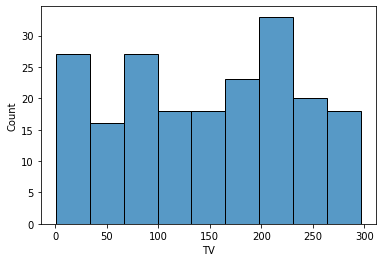

In [10]:
sns.histplot(data=df,x='TV')

<AxesSubplot:xlabel='Radio', ylabel='Count'>

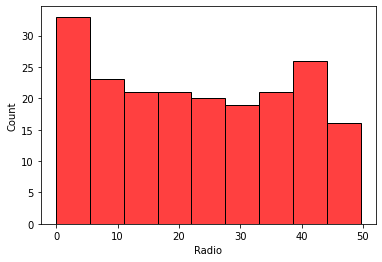

In [11]:
sns.histplot(data=df,x='Radio',color='red')

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

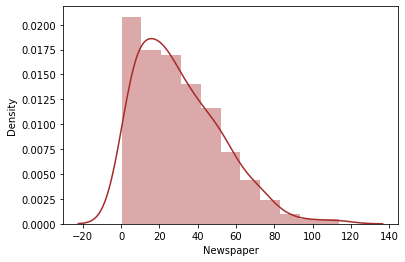

In [12]:
sns.distplot(df['Newspaper'],color='brown')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

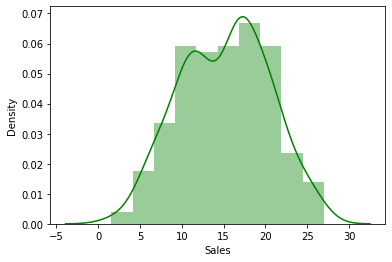

In [13]:
sns.distplot(df['Sales'],color='green')

# 4.2 Bivariate Analysis

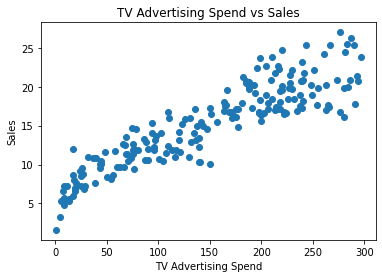

In [14]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV Advertising Spend vs Sales')
plt.show()

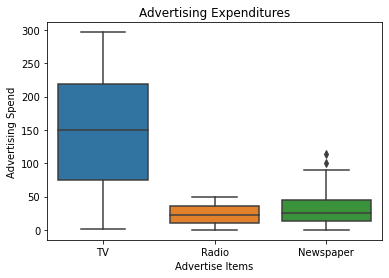

In [15]:
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Advertising Expenditures')
plt.xlabel('Advertise Items')
plt.ylabel('Advertising Spend')
plt.show()

# 4.3 Multivariate Analysis¶


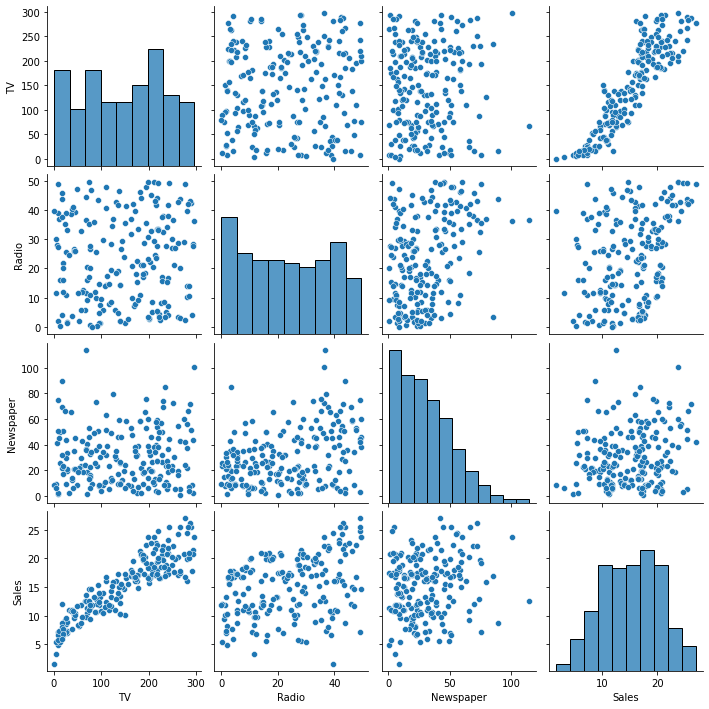

In [16]:
sns.pairplot(df)

Univariate Analysis:

TV, Radio, and Newspaper expenditures exhibit diverse distributions, with TV and Radio showing more variability compared to Newspaper.
Sales distribution is right-skewed, indicating most sales figures cluster around lower values with fewer high sales figures.

Bivariate Analysis:

The scatter plot of TV advertising spend versus sales confirms a clear positive trend, supporting the strong correlation observed.
A box plot of advertising expenditures reveals TV generally has the highest spend, followed by Radio and then Newspaper.

Multivariate Analysis:

The pair plot demonstrates positive trends between each advertising medium and sales, with TV advertising exhibiting the strongest relationship.

# Correlation

In [17]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


TV advertising has the highest correlation with sales (0.9012).

Radio advertising has a moderate correlation with sales (0.3496).

Newspaper advertising has a weak correlation with sales (0.1579).

# 5.Data Preprocessing

# Split the Data into Training and Testing Sets

In [18]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [21]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [22]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [23]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

# 6.Model Building

# 6.1 Linear Regression

In [24]:
lr = LinearRegression()

# 6.2 Train the Model

In [25]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lr.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [27]:
lr.intercept_

4.714126402214134

Coefficients:

TV: 0.0545, Radio: 0.1009, Newspaper: 0.0043

Intercept:

Intercept value of 4.7141 indicates the expected sales when there is no advertising spend on any medium. This suggests a base sales figure of approximately 4.714 thousand units.

# 7.Evaluate the Model

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

# 8.Evaluation Metrics

# 8.1 Mean Absolute Error

In [30]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  1.2748262109549344


# 8.2 Mean Squared Error 

In [31]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE):",mse)

Mean Squared Error (MSE): 2.9077569102710923


# 8.3 R-Suared Score

In [32]:
r2s=r2_score(y_test,y_pred)
print("R-Squared Score (R2S):",r2s)

R-Squared Score (R2S): 0.9059011844150826


The Mean Absolute Error (MAE) is a metric used to evaluate the performance of a regression model. It measures the average absolute difference between the predicted values and the actual values in the test set. Here, your MAE value is approximately 1.27.

Mean Squared Error (MSE): The Linear Regression model achieved a MSE of 2.91, indicating a small average squared difference between predicted and actual sales values.

R-Squared Score (R²): The high R² value of 0.906 signifies that approximately 90.6% of the variance in sales can be explained by the advertising expenditures on TV, Radio, and Newspaper.

# 9.Predict Sales for New Advertising Expenditures

In [33]:
a_X = [[100, 50, 25]]
print('Predicted Sales:',lr.predict(a_X))

Predicted Sales: [15.32073778]


New Advertising Expenditures:

TV:$100

Radio:$50 

Newspaper:$25

Predicted Sales: Approximately 15.32 thousand units

# 10.Visualization For Regression Model

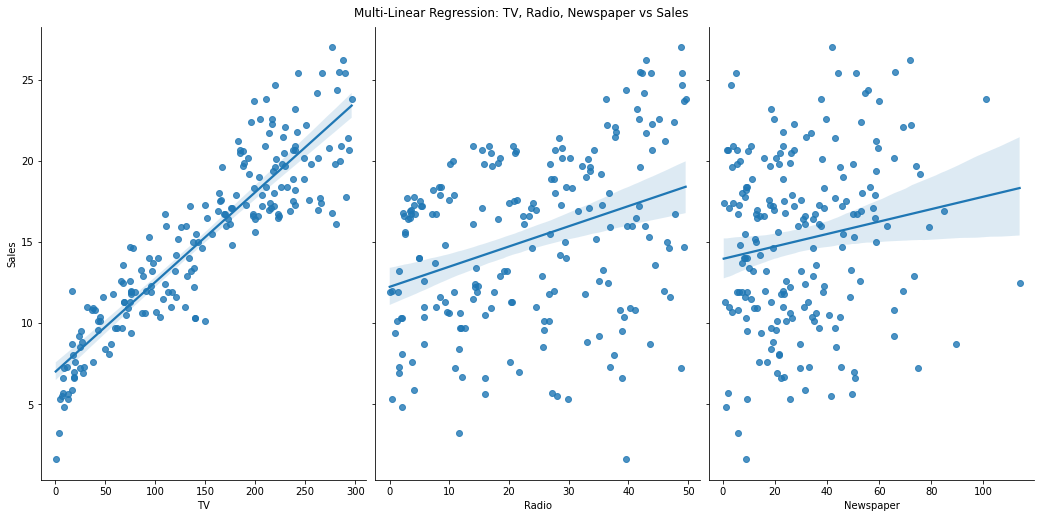

In [34]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')
plt.suptitle('Multi-Linear Regression: TV, Radio, Newspaper vs Sales', y=1.02)
plt.show()

# 11.Conclusion

This project exclusively utilized linear regression to forecast sales based on advertising expenditure. Despite its straightforward approach, the model provided meaningful insights into the connection between advertising investment and sales performance. Notably, the analysis underscored a positive correlation between advertising spend and sales figures, particularly emphasizing the significant impact of TV advertising.